Лабораторная работа 1. Линейная регрессия и факторный анализ 
-

**Цель:** изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качество

**Датасет:** [Happiness Index 2018-2019](https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019)

**Описание** В этом исследовании анализируется связь между показателем Индекса счастья в 2019 году и набором независимых переменных, таких как "Общий рейтинг", "ВВП на душу населения", "Социальная поддержка", "Ожидаемая продолжительность здоровой жизни", "Свобода выбора в жизни", "Щедрость" и "Восприятие коррупция". Целью данного исследования является изучение влияния этих независимых переменных на уровень счастья людей в течение года.

| Переменные    | Описание    |
|---|---|
| Overall rank    | Список рейтингов разных стран от 1 до 156 ((***ИСКЛЮЧАЕМ ТК ПО СУТИ ТОЖЕ САМОЕ ЧТО И SCORE***))  |
| Country or region    |  Список названий разных стран. (***ИСКЛЮЧАЕМ***) |
| Score    | Список показателей счастья в разных странах  (***ЗАВИСИМАЯ ПЕРЕМЕННАЯ***)   |
| GDP per capita    | Показатель ВВП на душу населения в разных странах.    |
| Social support    | Социальная поддержка в разных странах.    |
| Healthy life expectancy    | Ожидаемая продолжительность здоровой жизни в разных странах.   |
| Freedom to make life choices    | Оценка восприятия свободы в разных странах.    |
| Generosity    | оценка щедрости (качества быть добрым и великодушным) в разных странах.    |
| Perceptions of corruption    | Оценка восприятия коррупции в разных странах.    |

#### 1. Загрузка датасета из репозитория

In [42]:
import pandas as pandas

dataset = pandas.read_csv('2019.csv')
dataset = dataset.drop(columns=['Overall rank', 'Country or region'])
print(dataset)

     Score  GDP per capita  Social support  Healthy life expectancy  \
0    7.769           1.340           1.587                    0.986   
1    7.600           1.383           1.573                    0.996   
2    7.554           1.488           1.582                    1.028   
3    7.494           1.380           1.624                    1.026   
4    7.488           1.396           1.522                    0.999   
..     ...             ...             ...                      ...   
151  3.334           0.359           0.711                    0.614   
152  3.231           0.476           0.885                    0.499   
153  3.203           0.350           0.517                    0.361   
154  3.083           0.026           0.000                    0.105   
155  2.853           0.306           0.575                    0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.596       0.153                      0.393

#### 2.Подготовка данных: первичный анализ, визуализация распределения признаков и целевой переменной

In [43]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         156 non-null    float64
 1   GDP per capita                156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
 5   Generosity                    156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(7)
memory usage: 8.7 KB
None


Вывели данные, можно увидеть типы данных переменных и отсутвие нулевых(NaN) значений

In [44]:
print(dataset.describe())

            Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113120        0.398389        0.299191                 0.242124   
min      2.853000        0.000000        0.000000                 0.000000   
25%      4.544500        0.602750        1.055750                 0.547750   
50%      5.379500        0.960000        1.271500                 0.789000   
75%      6.184500        1.232500        1.452500                 0.881750   
max      7.769000        1.684000        1.624000                 1.141000   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    156.000000  156.000000                 156.000000  
mean                       0.392571    0.184846                   0.110603  
std                        0.143289    0.095254                   

Score
-----------------------
Эксцесс: -0.627
Асимметрия: 0.011
Колмогорова-Смирнова p-value: 0.6389817597934611
Колмогорова-Смирнова статистика: 0.058
Колмогорова-Смирнова нормальность: True
p_value: 0.05
-----------------------
GDP per capita
-----------------------
Эксцесс: -0.784
Асимметрия: -0.382
Колмогорова-Смирнова p-value: 0.27777164168670687
Колмогорова-Смирнова статистика: 0.078
Колмогорова-Смирнова нормальность: True
p_value: 0.05
-----------------------
Social support
-----------------------
Эксцесс: 1.152
Асимметрия: -1.124
Колмогорова-Смирнова p-value: 0.06635296449896844
Колмогорова-Смирнова статистика: 0.103
Колмогорова-Смирнова нормальность: True
p_value: 0.05
-----------------------
Healthy life expectancy
-----------------------
Эксцесс: -0.331
Асимметрия: -0.608
Колмогорова-Смирнова p-value: 0.015812848138336114
Колмогорова-Смирнова статистика: 0.123
Колмогорова-Смирнова нормальность: False
p_value: 0.05
-----------------------
Freedom to make life choices
--------

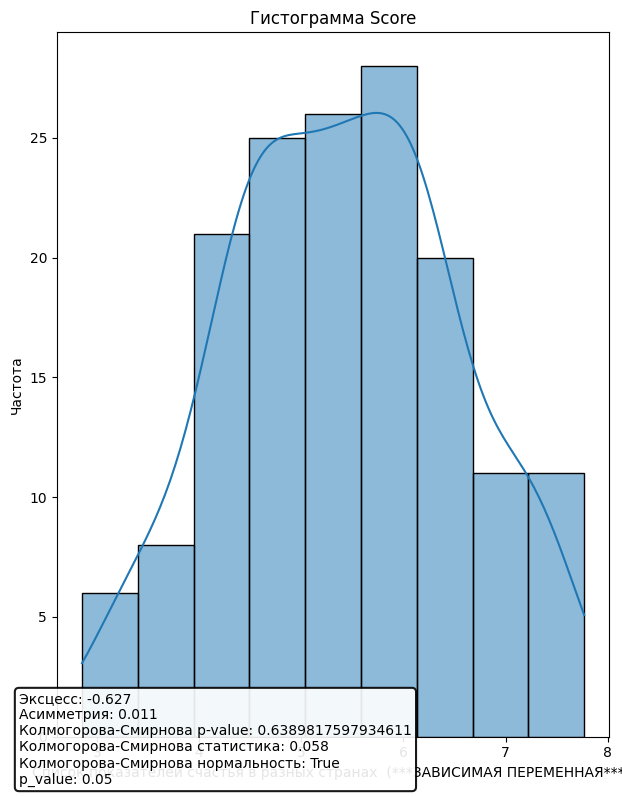

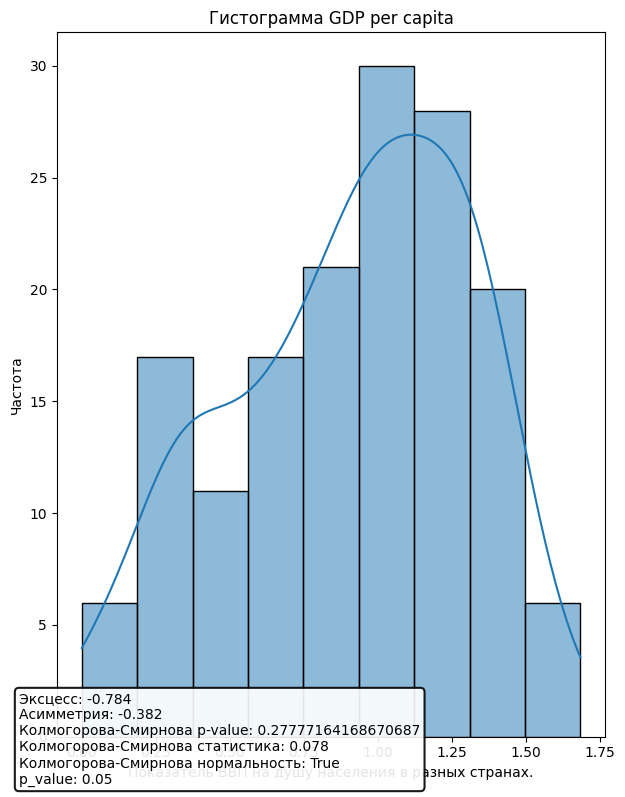

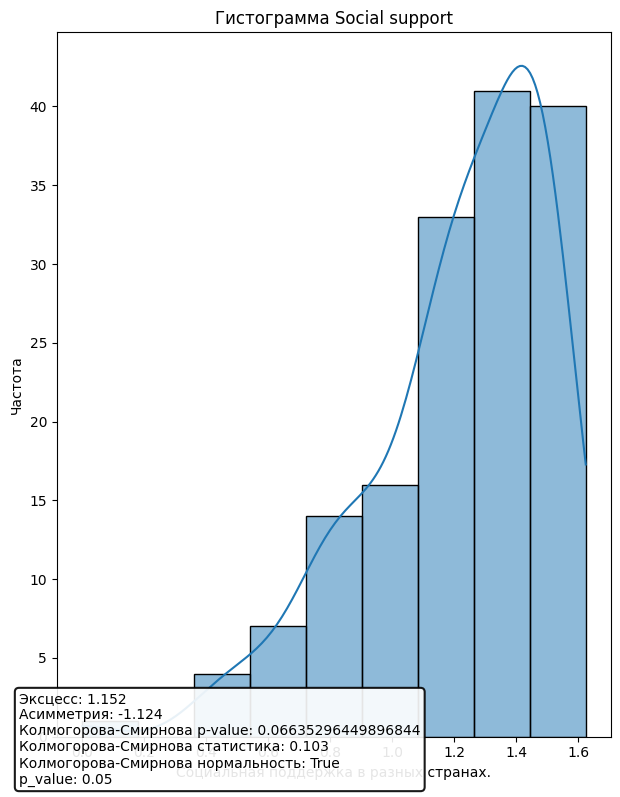

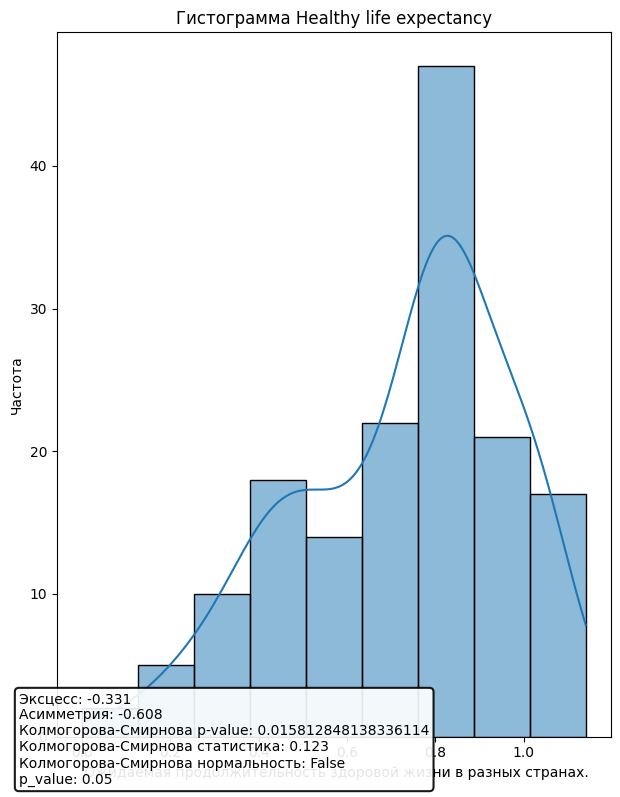

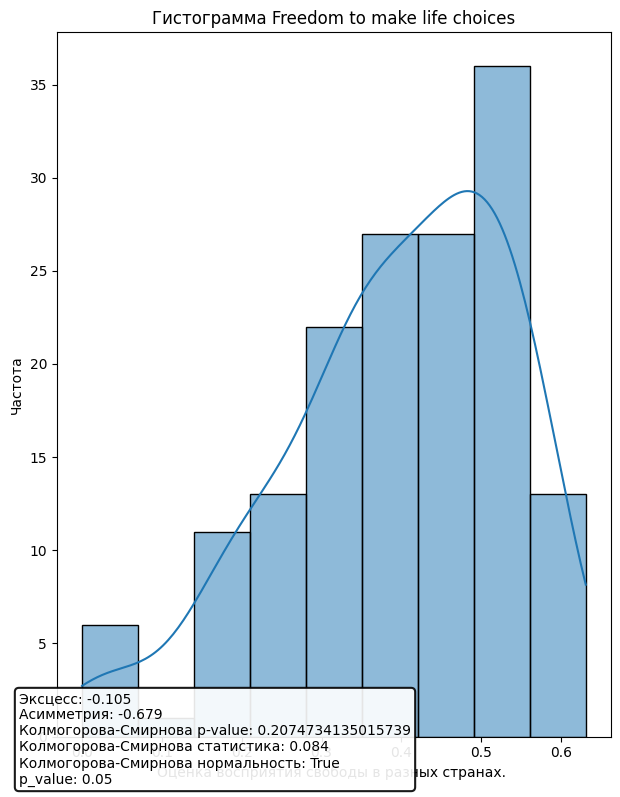

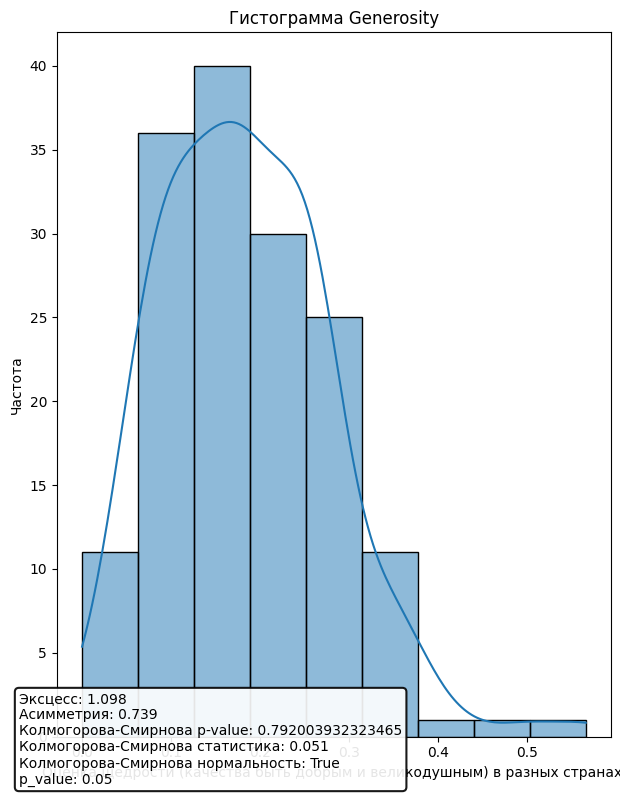

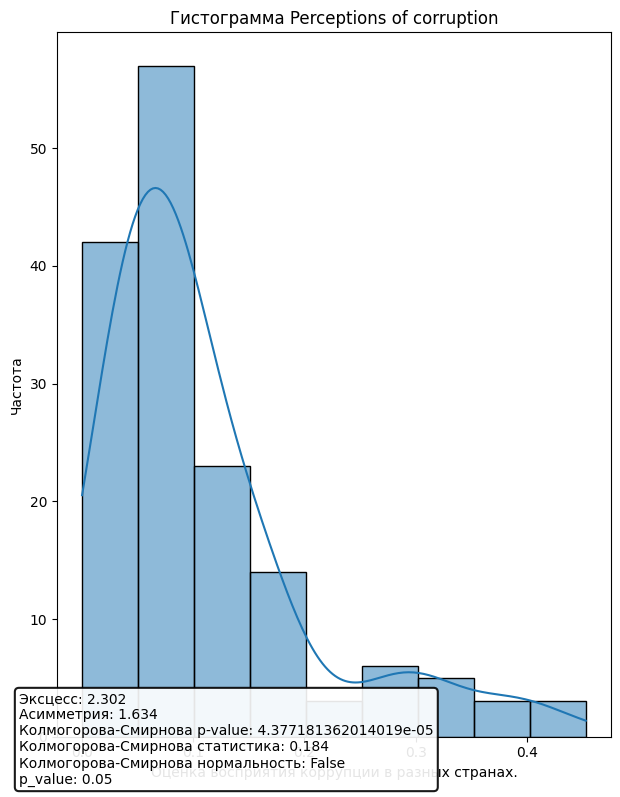

In [56]:
import matplotlib.pyplot as plot
import seaborn
from scipy.stats import norm, skew, kurtosis, kstest
import numpy

ALPHA = 0.05

descriptions = {
    'Score': 'Список показателей счастья в разных странах  (***ЗАВИСИМАЯ ПЕРЕМЕННАЯ***) ',
    'GDP per capita': 'Показатель ВВП на душу населения в разных странах.',
    'Social support': 'Социальная поддержка в разных странах.',
    'Healthy life expectancy': ' Ожидаемая продолжительность здоровой жизни в разных странах.',
    'Freedom to make life choices': 'Оценка восприятия свободы в разных странах. ',
    'Generosity': 'Оценка щедрости (качества быть добрым и великодушным) в разных странах.',
    'Perceptions of corruption': 'Оценка восприятия коррупции в разных странах.',

}

for _,column in enumerate(dataset.columns):
    plot.figure(figsize=(12, 8))
    plot.subplot(1, 2, 1)
    seaborn.histplot(dataset[column], kde=True, bins='sturges')
    kstestObject = kstest(dataset[column], 'norm', args=(numpy.mean(dataset[column]), numpy.std(dataset[column])))

    #seaborn.histplot(dataset[column], kde=True, bins='sturges', stat='density')
    
    #mu, std = dataset[column].mean(), dataset[column].std()
    #x = numpy.linspace(dataset[column].min(), dataset[column].max(), 100)
    #p = norm.pdf(x, mu, std)
    #plot.plot(x, p, 'r-', linewidth=2, label='Нормальное распределение')
    #seaborn.distplot(dataset[column], fit=norm)
    legendText = (f'Эксцесс: {kurtosis(dataset[column]):.3f}\n'
              f'Асимметрия: {skew(dataset[column]):.3f}\n'
              f'Колмогорова-Смирнова p-value: {kstestObject.pvalue}\n'
              f'Колмогорова-Смирнова статистика: {kstestObject.statistic:.3f}\n'
              f'Колмогорова-Смирнова нормальность: {kstestObject.pvalue >= ALPHA}\n'
              f'p_value: {ALPHA}')
    plot.figtext(0.02, 0.01, legendText, 
            ha='left',
            va='bottom',
            fontsize=10,
            bbox=dict(boxstyle='round', 
                      facecolor='white', 
                      edgecolor='black',
                      linewidth=1.5,
                      alpha=0.9))
    plot.subplots_adjust(bottom=0.5)
    print(column)
    print('-----------------------')
    print(legendText)
    print('-----------------------')

    plot.title(f'Гистограмма {column}')
    plot.xlabel(descriptions[column])
    plot.ylabel('Частота') 
    plot.tight_layout()

Анализ распределений:

- 1. score
  - Эксцесс: -0.627 - плосковершинное распределение
  - Ассиметрия: 0.011 - слабая правостороняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05

- 2. GDP per capita
  - Эксцесс:  -0.784 - плосковершинное распределение
  - Ассиметрия:  -0.382 - умеренная левосторянняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05


- 3. Social support
  - Эксцесс: 1.152 - островершинное распределение
  - Ассиметрия: -1.124 - умеренная левосторянняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05


- 4. Healthy life expectancy
  - Эксцесс: -0.331 - плосковершинное распределение
  - Ассиметрия:  -0.608 - левосторянняя ассиметрия
  - Колмогоров-Смирнов: не является нормальным распределением, тк p value < 0.05


- 5. Freedom to make life choices
  - Эксцесс: -0.105 - плосковершинное распределение
  - Ассиметрия:  -0.679 - левосторянняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05


- 6. Generosity
  - Эксцесс: 1.098 - островершинное распределение
  - Ассиметрия: 0.739 - правосторянняя ассиметрия
  - Колмогоров-Смирнов: является нормальным распределением, тк p value > 0.05


- 7. Perceptions of corruption
  - Эксцесс: 2.302 - островершинное распределение
  - Ассиметрия:  1.634 - правосторянняя ассиметрия
  - Колмогоров-Смирнов: не является нормальным распределением, тк p value < 0.05


#### 3. Проводим предобработку данных: удаляем пропущенные значения, закодируем категориальные переменные (опционально), нормализуем признаки.

In [57]:
dataset_new = dataset.replace('?', pandas.NA).dropna()

print(f"Исходный размер: {dataset.shape}")
print(f"Размер после удаления пропущенных значений: {dataset_new.shape}")

Исходный размер: (156, 7)
Размер после удаления пропущенных значений: (156, 7)


Можно повторить вывод выше что в данном датасете отсутсвуют NaN значения

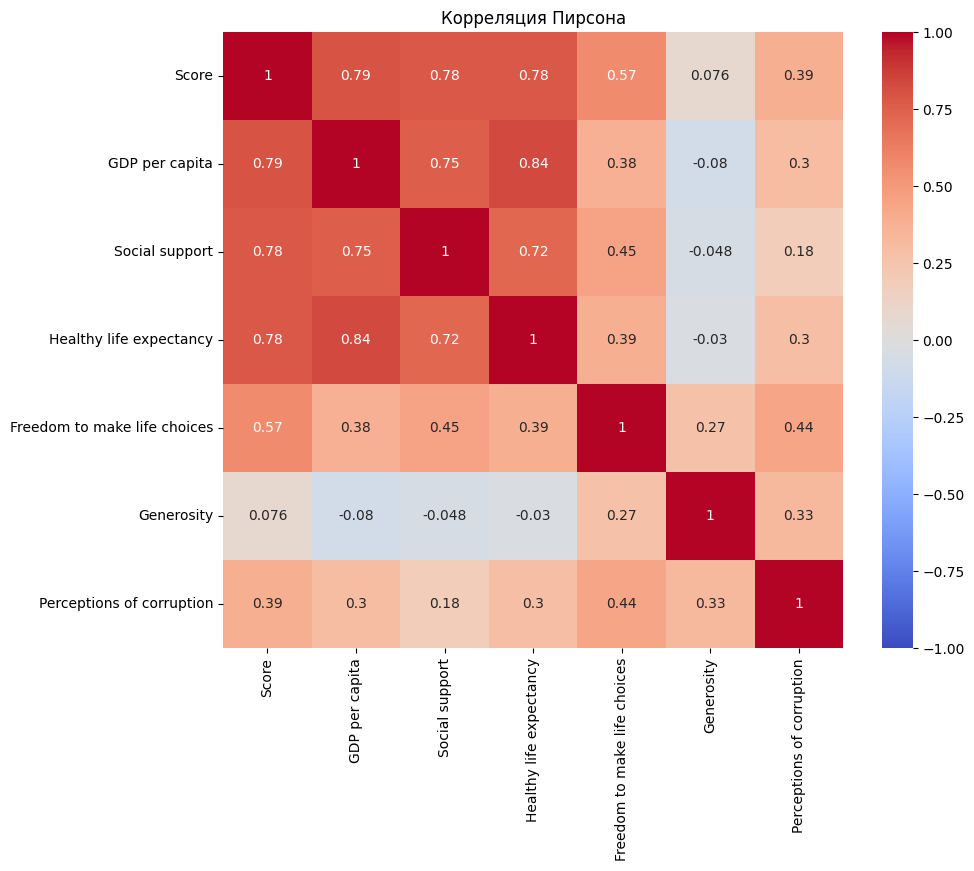


Корреляция с целевой переменной (Score):
GDP per capita: 0.794
Healthy life expectancy: 0.780
Social support: 0.777
Freedom to make life choices: 0.567
Perceptions of corruption: 0.386
Generosity: 0.076


In [61]:
pearson_corr = dataset[dataset.columns.tolist()].corr(method='pearson')

plot.figure(figsize=(10, 8))
seaborn.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plot.title('Корреляция Пирсона')
plot.show()

print("\nКорреляция с целевой переменной (Score):")
income_corr = pearson_corr['Score'].sort_values(key=abs, ascending=False)
for feature, corr_value in income_corr.items():
    if feature != 'Score':
        print(f"{feature}: {corr_value:.3f}")
